In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("weather.csv")
df.head()


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,8.0,24.3,NW,30.0,29,1015.0,23.6,Yes
1,14.0,26.9,ENE,39.0,36,1008.4,25.7,Yes
2,13.7,23.4,NW,85.0,69,1007.2,20.2,Yes
3,13.3,15.5,NW,54.0,56,1007.0,14.1,Yes
4,7.6,16.1,SSE,50.0,49,1018.5,15.4,No


In [9]:
df.shape

(366, 8)

In [3]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,8.0,24.3,NW,30.0,29,1015.0,23.6,1
1,14.0,26.9,ENE,39.0,36,1008.4,25.7,1
2,13.7,23.4,NW,85.0,69,1007.2,20.2,1
3,13.3,15.5,NW,54.0,56,1007.0,14.1,1
4,7.6,16.1,SSE,50.0,49,1018.5,15.4,0
...,...,...,...,...,...,...,...,...
361,9.0,30.7,NNW,76.0,15,1010.8,30.0,0
362,7.1,28.4,N,48.0,22,1016.9,28.2,0
363,12.5,19.9,ESE,43.0,47,1022.8,18.3,0
364,12.5,26.9,NW,46.0,39,1016.2,25.9,0


In [4]:
df1=df
df1

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,8.0,24.3,NW,30.0,29,1015.0,23.6,1
1,14.0,26.9,ENE,39.0,36,1008.4,25.7,1
2,13.7,23.4,NW,85.0,69,1007.2,20.2,1
3,13.3,15.5,NW,54.0,56,1007.0,14.1,1
4,7.6,16.1,SSE,50.0,49,1018.5,15.4,0
...,...,...,...,...,...,...,...,...
361,9.0,30.7,NNW,76.0,15,1010.8,30.0,0
362,7.1,28.4,N,48.0,22,1016.9,28.2,0
363,12.5,19.9,ESE,43.0,47,1022.8,18.3,0
364,12.5,26.9,NW,46.0,39,1016.2,25.9,0


In [5]:
df1=df.drop(columns=['WindGustDir'])
df1

,MinTemp,MaxTemp,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,8.0,24.3,30.0,29,1015.0,23.6,1
1,14.0,26.9,39.0,36,1008.4,25.7,1
2,13.7,23.4,85.0,69,1007.2,20.2,1
3,13.3,15.5,54.0,56,1007.0,14.1,1
4,7.6,16.1,50.0,49,1018.5,15.4,0
...,...,...,...,...,...,...,...
361,9.0,30.7,76.0,15,1010.8,30.0,0
362,7.1,28.4,48.0,22,1016.9,28.2,0
363,12.5,19.9,43.0,47,1022.8,18.3,0
364,12.5,26.9,46.0,39,1016.2,25.9,0


In [6]:
X = df1.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']


In [7]:
X

,MinTemp,MaxTemp,WindGustSpeed,Humidity,Pressure,Temp
0,8.0,24.3,30.0,29,1015.0,23.6
1,14.0,26.9,39.0,36,1008.4,25.7
2,13.7,23.4,85.0,69,1007.2,20.2
3,13.3,15.5,54.0,56,1007.0,14.1
4,7.6,16.1,50.0,49,1018.5,15.4
...,...,...,...,...,...,...
361,9.0,30.7,76.0,15,1010.8,30.0
362,7.1,28.4,48.0,22,1016.9,28.2
363,12.5,19.9,43.0,47,1022.8,18.3
364,12.5,26.9,46.0,39,1016.2,25.9


In [10]:
y

0      1
1      1
2      1
3      1
4      0
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainTomorrow, Length: 366, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8108108108108109
[[55  3]
 [11  5]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        58
           1       0.62      0.31      0.42        16

    accuracy                           0.81        74
   macro avg       0.73      0.63      0.65        74
weighted avg       0.79      0.81      0.79        74



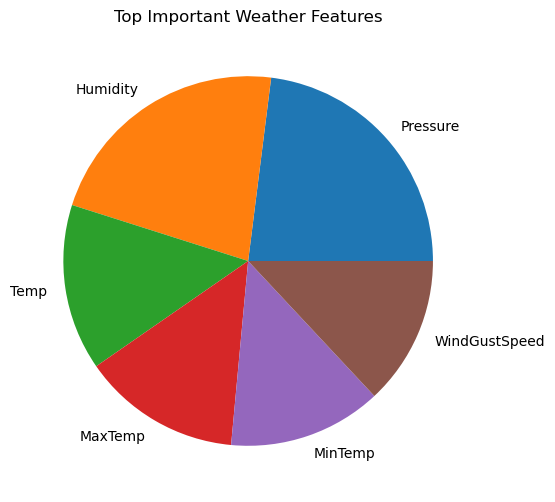

In [14]:
feature_importance = pd.Series(
    model.feature_importances_, index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='pie')
plt.title("Top Important Weather Features")
plt.show()


In [15]:
input_data = {
    'MinTemp': 18.0,
    'MaxTemp': 28.0,
    'WindGustSpeed': 35.0,
    'Humidity': 95.0,
    'Pressure': 10.0,
    'Temp': 50.0
}


In [16]:
input_df = pd.DataFrame([input_data])

In [17]:
input_df = input_df.reindex(columns=X.columns, fill_value=0)


In [18]:
prediction = model.predict(input_df)

if prediction[0]:
    print("🌧️- Rain Tomorrow: TRUE")
else:
    print("☀️- Rain Tomorrow: FALSE")


🌧️- Rain Tomorrow: TRUE
